# **PYCARET** – A LOW CODE MACHINE LEARNING LIBRARY

In [1]:
pip install pycaret                  # Installing PyCaret

     |████████████████████████████████| 256kB 2.7MB/s 
     |████████████████████████████████| 1.2MB 12.4MB/s 
     |████████████████████████████████| 6.8MB 19.3MB/s 
     |████████████████████████████████| 1.6MB 44.4MB/s 
     |████████████████████████████████| 266kB 37.8MB/s 
     |████████████████████████████████| 266kB 43.2MB/s 
     |████████████████████████████████| 174kB 39.7MB/s 
     |████████████████████████████████| 66.1MB 52kB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
     |████████████████████████████████| 12.4MB 39.6MB/s 
     |████████████████████████████████| 552kB 38.4MB/s 
     |████████████████████████████████| 604kB 37.0MB/s 
     |████████████████████████████████| 3.1MB 43.4MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 2.1MB 37.5MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
 

In [2]:
#importing necessary libraries
import numpy as np 
import pandas as pd 


In [3]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "test.csv" with length 451405 bytes
User uploaded file "train.csv" with length 460676 bytes


In [5]:
train=pd.read_csv("train.csv")             #importing and reading data
test=pd.read_csv("test.csv")

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Handling Missing Values

In [10]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [12]:
train=train.fillna(0)
test=test.fillna(0)

# **ENVIRONMENT SETUP**
The most important feature in PyCaret is setting up an environment.

In [13]:
from pycaret.regression import *                           # Importing necessary functions of Regression from PyCaret

Session ID is a random number known as session_id  can be passed as an argument in the setup function. This will help in reproducibility of the environment in the same or different environment. 
Setting up AutoML with Transformation and PCA with 0.8. See how a single line of code has taken most of the hectic work

In [14]:
reg1 = setup(train, target='SalePrice', train_size=0.8, session_id=117,                            #TRAIN-TEST SPLIT: By default, the ratio in which data is split into train and test sets is 70 and 30 percent respectively. This can be changed using train_size as an argument in the setup environment. 
             numeric_imputation = 'mean',
             categorical_features = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
                                     'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',   
                                     'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',    
                                     'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
                                     'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',   
                                     'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                     'SaleCondition']  , 
             ignore_features = ['Id','Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],
             log_experiment=True, 
             transformation=True, pca=True, pca_method='linear',pca_components=0.8,remove_multicollinearity=True, multicollinearity_threshold=0.93)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,117
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1460, 81)"
4,Missing Values,False
5,Numeric Features,21
6,Categorical Features,59
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


DATA PRE-PROCESSING 
About 80 percent of time consumed lies in pre-processing and cleaning the data. PyCaret automatically has the ability of pre-processing the data. PyCaret provides a library of over 25 preprocessing steps that can be used to prepare your data. From feature transformation to advanced feature engineering, PyCaret automates it all.

# **COMPARING MODELS**
Comparing a variety of regression models, i am measureing score based on R2


A useful feature in PyCaret is compare_model function which  trains and compares all available models based on modules imported ( say regression / classification / clustering ) with respect to common evaluation metrics using K-Fold Cross validation.

This feature produces a table of the model results in terms of evaluation metrics being sorted with the better model first and the lower performed model at the bottom. 

For classification problems, The table is sorted based on higher accuracy and R2 Score for regression problems. The default value of k in k-fold is set to 10. This can also be changed using fold as an argument within compare_models() function

In [15]:
compare_models(fold=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extreme Gradient Boosting,19164.7774,995115891.3921,31504.3219,0.8396,0.1569,0.1133,0.2622
1,Extra Trees Regressor,19248.4496,1044769656.8209,32180.4666,0.8360,0.1586,0.1136,0.7573
2,CatBoost Regressor,18785.7561,1049677993.7917,32270.6044,0.8353,0.1554,0.1110,12.0063
3,Gradient Boosting Regressor,19448.0794,1044561253.1156,32183.4528,0.8319,0.1597,0.1149,1.1255
4,Random Forest,20586.8128,1189042796.6553,34416.1875,0.8096,0.1663,0.1202,1.6560
5,Light Gradient Boosting Machine,20566.5569,1282429473.2848,35751.9851,0.7932,0.1652,0.1191,0.7032
6,Huber Regressor,20842.0076,1346901191.8739,36585.3376,0.7904,0.1738,0.1235,0.0365
7,Passive Aggressive Regressor,20892.3482,1387150672.1226,37091.0743,0.7851,0.1712,0.1220,0.1980
8,Random Sample Consensus,21266.2148,1390450029.5599,37129.0027,0.7847,0.1721,0.1234,0.2704
9,Bayesian Ridge,21975.4007,1403384719.0366,37400.4914,0.7794,0.1889,0.1331,0.0107


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=117,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

# CREATING A MODEL 
A model can be created using the ‘create_model’ function which takes only one value as a parameter. 

In [17]:
EGB = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18663.3483,768974359.3414,27730.3869,0.9024,0.1288,0.0963
1,16904.9062,550259223.8028,23457.6048,0.8503,0.1389,0.1080
2,19022.9528,1220584951.4214,34936.8709,0.7758,0.1669,0.1204
3,22716.8017,1089665928.9032,33010.0883,0.8907,0.2195,0.1542
4,17579.6061,770345798.6747,27755.1040,0.8969,0.1414,0.1067
5,17935.8248,1003143773.2524,31672.4450,0.8468,0.1359,0.0944
6,22362.6494,1342761180.9742,36643.7059,0.8400,0.1606,0.1165
7,22468.9746,1060403680.8919,32563.8401,0.7712,0.1855,0.1429
8,16555.6757,605699079.9091,24610.9545,0.8872,0.1473,0.1050
9,19196.2382,1431660745.2354,37837.2930,0.6747,0.1578,0.1136


# **MODEL ANALYSIS**
Analysis of models is the most time consuming part in any Machine Learning process. PyCaret makes our work easier in this phase too.

**PLOT MODEL** 
Plotting the model based on different metrics can be done using plot_model feature. The parameters within plot_model are trained model object and type of plot. 

Types of plot include confusion  matrix, AUC, Residual plots etc.,  

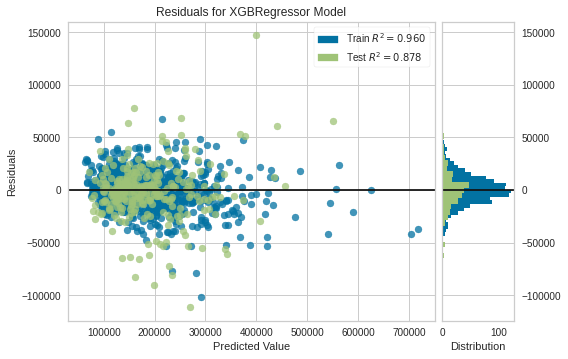

In [23]:
plot_model(EGB)

# **INTERPRET MODEL**
Interpretation of a model based on different metrics can be done using interpret_model function. 

Similar to plot_model function, interpret_model also takes two parameters. One is a trained model object and the other is type of plot as string.

In [25]:
pip install shap        #to interpret the model.

     |████████████████████████████████| 327kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456454 sha256=90a85265466a2dabbc69d55c82b2295129913ec1f114b31ce257e9a27c578f47
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


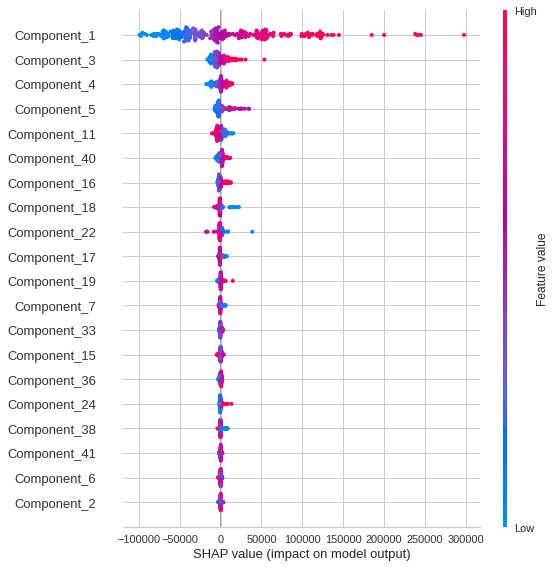

In [26]:
interpret_model(EGB)

# **MODEL TESTING**
We have successfully built our model and interpreted the results using the above features in PyCaret. Inorder to see how the model works, predictions should be done on either test set or new data. 

**predict_model** will predict on the test data from the pipeline taking the trained model object as parameter. 

In [27]:
y_pred = predict_model(EGB)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,17340.649,6.900218e+08,26268.2666,0.8777,0.1373,0.0971


# **FINALIZING A MODEL**
finalize_model is a function that allows to train the chosen model for the last time on the entire dataset. final_model takes a trained model object as a parameter.

In [28]:
final_model = finalize_model(EGB)

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,Component_11,Component_12,Component_13,Component_14,Component_15,Component_16,Component_17,Component_18,Component_19,Component_20,Component_21,Component_22,Component_23,Component_24,Component_25,Component_26,Component_27,Component_28,Component_29,Component_30,Component_31,Component_32,Component_33,Component_34,Component_35,Component_36,Component_37,Component_38,Component_39,Component_40,Component_41,Component_42,SalePrice,Label
0,-2.676066,1.826050,-0.735937,0.050992,-0.743967,-0.027116,-0.656687,0.566311,-0.945049,0.431457,0.378949,-0.864213,-0.341714,-0.363460,-0.393964,0.531311,0.005339,-0.311511,0.995650,0.390135,-0.126010,-0.047335,-0.058146,-0.187987,-0.689892,0.851555,1.338830,-0.538390,0.053980,0.289926,0.001384,0.136442,-0.146431,-0.903859,0.581915,0.332257,-0.185861,0.506596,0.529075,-0.195435,-0.651160,-0.259409,125000.0,117364.304688
1,-1.501727,1.680800,-2.197614,1.479821,-0.289110,0.468086,0.010622,-0.482688,0.470687,0.842625,-0.941821,-1.830513,0.435732,0.326478,1.370781,0.160886,0.159983,-1.091136,-0.484919,0.930721,0.014386,-0.028262,-0.514542,-0.201782,0.107753,-0.053798,0.197805,-0.406935,-0.348339,-0.721180,-0.381695,0.198364,-0.388528,-0.023608,0.440600,0.373367,-0.651737,0.453221,-0.286418,0.807130,0.521025,-0.053308,135960.0,143430.125000
2,0.688071,2.611338,1.864217,0.128579,0.261368,-1.272875,-0.464507,3.091125,0.502976,-0.109682,-1.648348,-0.027756,0.240302,-0.270653,-0.084609,-0.165166,0.462807,0.754869,0.094810,0.756620,-0.432346,-0.683885,-0.236354,-0.360934,0.381714,0.086430,-0.983298,-0.505758,-0.401860,0.145265,0.121764,0.040160,0.372988,0.413019,0.072080,-0.849030,-0.380669,-0.500615,0.206450,-0.118129,-0.019333,-0.471645,289000.0,198567.687500
3,-1.726293,-0.032175,-1.494308,2.648063,-0.627787,0.532410,0.229694,-0.955922,1.268735,-2.363092,1.248312,0.864453,0.803346,-1.364978,0.738747,1.282383,1.035677,0.126074,0.983286,0.555197,-0.740376,0.496662,0.115290,-0.221992,-0.130538,-0.176258,-0.500347,-0.326078,0.217908,0.282096,-0.672411,0.154569,-0.052767,-0.119167,-0.449959,-0.547281,-0.303031,0.576247,0.380348,0.029261,0.152133,-0.260169,147000.0,138875.828125
4,-3.502035,-3.171824,0.670301,-1.230648,3.319422,-0.274163,0.702703,-1.274261,-0.792075,-1.087630,-1.203459,1.218014,1.243517,0.201217,-1.429407,0.201876,-0.388764,0.719972,-0.368838,0.604227,-1.083768,0.495544,0.394020,0.298309,0.250537,0.056257,0.158301,-0.492838,0.691922,0.415262,-0.647593,-1.345944,0.226856,-0.505866,-0.480188,-0.551980,-0.412738,-0.596621,-0.266648,0.027707,0.297404,-0.258817,127000.0,110402.406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2.065689,1.996042,1.595196,-1.096743,-0.309268,-1.663528,0.284988,-0.169250,-0.295568,0.269288,0.866217,0.149022,-1.493516,-0.501496,-0.342247,-0.041128,1.005254,0.901299,0.333872,0.584123,0.189916,0.785277,0.055700,-0.259956,0.499914,0.408161,-0.706005,1.090721,0.600727,-0.493500,-0.385534,0.510856,-0.066849,0.311095,0.349669,0.210916,0.182410,-1.099250,0.049798,0.315585,0.348440,-0.202867,190000.0,217233.406250
288,1.241068,2.995731,0.984373,1.437659,-0.482581,0.188925,0.428523,-1.509436,-0.133099,1.115845,-0.395700,-1.983464,0.963566,0.940357,1.041123,-0.530068,-1.308743,-0.427943,-0.084459,-0.499051,-0.868430,1.874633,1.251800,1.618207,-0.140732,-0.161027,0.405168,0.251724,-0.309293,-1.116770,-0.208114,-0.035479,1.088362,0.645659,-0.029224,-0.405750,-0.095001,0.437013,0.985255,0.531505,0.192677,0.219734,168000.0,214724.656250
289,-2.215919,0.527677,1.427837,-0.396641,1.750591,0.237268,-1.353502,1.290772,4.232638,1.939075,3.537373,-2.744839,-1.010837,0.468828,-2.446528,-0.054984,0.769791,0.063344,1.335258,-0.894222,0.410492,-0.625482,-0.044889,0.589091,-0.061355,0.337234,0.750878,-0.338719,-0.349829,0.736667,0.351693,0.

SAVING A MODEL AND EXPERIMENT
save_model is a function that saves a model and its entire pipeline as a pickle file. It takes two parameters which are the trained model object and the name to be saved as a string. This saved model can later be used using load_model function. 

In [29]:
# Saving a machine learning model
model_saved = save_model(EGB, 'EGB_01')

# Load the saved model
model_loaded = load_model('EGB_01')

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Successfully Loaded
